<a href="https://colab.research.google.com/github/BetoACE/Python.-De-cero-a-ML/blob/main/Random_Forest_ML_UNAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest

Random Forest es un algoritmo de aprendizaje automático supervisado que se basa en el aprendizaje conjunto. En este núcleo, construyo dos modelos de clasificador de bosque aleatorio para predecir la seguridad del automóvil, uno con 10 árboles de decisión y otro con 100 árboles de decisión. La precisión esperada aumenta con el número de árboles de decisión en el modelo. He demostrado el proceso de selección de funciones utilizando el modelo Random Forest para encontrar solo las funciones importantes, reconstruir el modelo utilizando estas funciones y ver su efecto en la precisión.

Créditos: Prashant Banerjee






#  Introducción al bosque aleatorio


El bosque aleatorio es un algoritmo de aprendizaje supervisado. Tiene dos variaciones: una se usa para problemas de clasificación y otra para problemas de regresión. Es uno de los algoritmos más flexibles y fáciles de usar. Crea árboles de decisión a partir de las muestras de datos dadas, obtiene predicciones de cada árbol y selecciona la mejor solución mediante votación. También es un indicador bastante bueno de la importancia de las funciones.

El algoritmo de bosque aleatorio combina múltiples árboles de decisión, lo que da como resultado un bosque de árboles, de ahí el nombre de bosque aleatorio. En el clasificador de bosque aleatorio, cuanto mayor sea el número de árboles en el bosque, mayor será la precisión.

# Bosque Aleatorio (RF)🌳 🌳🌳🌳

La intuición del algoritmo de bosque aleatorio se puede dividir en dos etapas.

En la primera etapa, seleccionamos aleatoriamente "k" características del total de m características y construimos el bosque aleatorio. En la primera etapa, procedemos de la siguiente manera: -

Seleccione aleatoriamente k características de un total de m características donde k < m.
Entre las k características, calcule el nodo d utilizando el mejor punto de división.
Divida el nodo en nodos hijos utilizando la mejor división.
Repita de 1 a 3 pasos hasta alcanzar el número l de nodos.
Construya un bosque repitiendo los pasos 1 a 4 n veces para crear n árboles.
En la segunda etapa, hacemos predicciones utilizando el algoritmo de bosque aleatorio entrenado.

Tomamos las características de prueba y utilizamos las reglas de cada árbol de decisión creado aleatoriamente para predecir el resultado y almacenarlo.
Luego, calculamos los votos para cada objetivo previsto.
Finalmente, consideramos el objetivo predicho con mayor votación como la predicción final del algoritmo de bosque aleatorio.

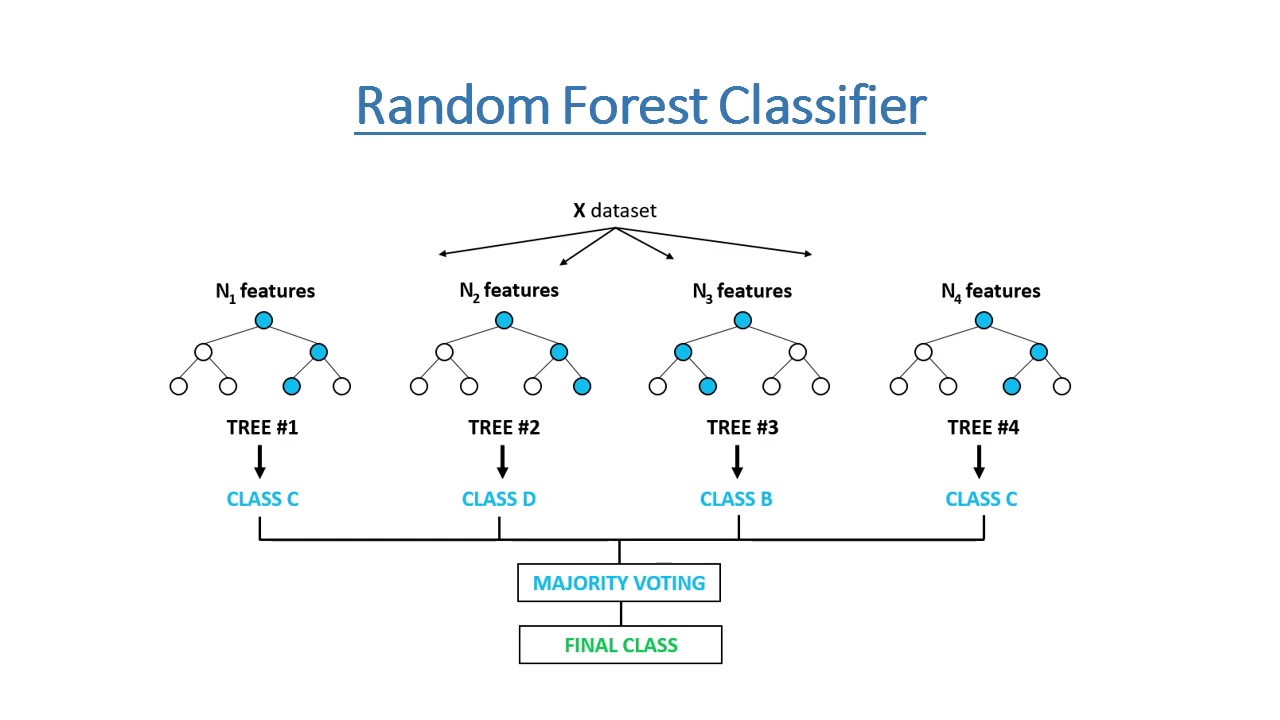



# Diferencias

 Algunas características destacadas de comparación son las siguientes: -

* Los bosques aleatorios son un conjunto de múltiples árboles de decisión.

* Los árboles de decisión son computacionalmente más rápidos en comparación con los bosques aleatorios.

* Los árboles de decisión profundos pueden sufrir un sobreajuste. El bosque aleatorio evita el sobreajuste creando árboles en bosques aleatorios.

* El bosque aleatorio es difícil de interpretar. Sin embargo, un árbol de decisiones es fácilmente interpretable y se puede convertir en reglas.

# ¡Vamos al código! ⏭


In [1]:
# importamos librerías

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
#cargamos el conjunto de datos

df = pd.read_csv('car_evaluation.csv')

In [3]:
# Analisis exploratorio

df.info()

df.isnull().sum()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [4]:
#Renombrar las columnas

col_names=['buying','maint', 'doors','persons','lug_boot', 'safety','class']

df.columns = col_names

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
pd.value_counts(df['class'])

<ipython-input-7-2eddd7aee825>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['class'])


,count
class,
unacc,1209
acc,384
good,69
vgood,65


In [8]:
#Construir vector de características y definir variable objetivo

#Separar los datos en caracteristicas (x) y la variable objetivo (y)

X=df.drop(['class'], axis=1)

Y=df['class']

In [9]:
# Divida los datos en conjuntos separados de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
#Como quedan organizados los conjuntos de datos

X_train.shape, X_test.shape



((1381, 6), (346, 6))

In [11]:
#Codificando las variables categóricas
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [12]:
import category_encoders as ce

In [13]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [14]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


# Algoritmo Random Forest (con parámetros por defecto)

In [15]:
#importamos el módulo

from sklearn.ensemble import RandomForestClassifier


# Instancia del clasificador

rfc = RandomForestClassifier(random_state=0)


# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [16]:
# Predecir los resultados del conjunto de pruebas con el índice de gini de criterio¶


y_pred = rfc.predict(X_test)

#¿Cómo le fue al modelo?

Validemos la presición del modelo

In [19]:
#Verifique la puntuación de precisión con el índice de gini de criterio

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision trees: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Model accuracy score with 10 decision trees: 0.9480


# Random Forest Classifier ¡con 100 árboles!

In [30]:


from sklearn.ensemble import RandomForestClassifier


# Instancia del clasificador

rfc_100 = RandomForestClassifier(n_estimators=44, random_state=0)


# fit the model

rfc_100.fit(X_train, y_train)

# Predecir los resultados del conjunto de pruebas con el índice de gini de criterio¶


y_pred_100 = rfc_100.predict(X_test)


In [31]:
#Como le fué al modelo:  medidas de precisión (lo observado vs lo predicho)

from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision trees: {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))



Model accuracy score with 100 decision trees: 0.9509


# ¡Encuentrar características importantes con el modelo Random Forest!

In [38]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
safety,0.295863
persons,0.237948
buying,0.210130
maint,0.116646
lug_boot,0.079526
doors,0.059887


Graficando el score de las variables

<Axes: xlabel='None', ylabel='None'>

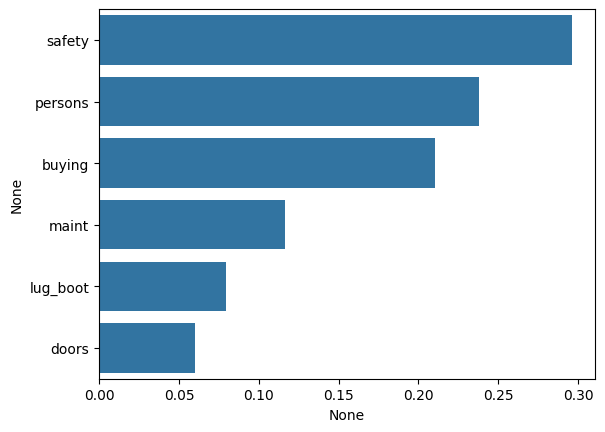

In [40]:
sns.barplot(x=feature_scores, y=feature_scores.index)

# Métricas de precisión

Confusion matrix

In [43]:
# Print the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_100)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 74   3   0   0]
 [  4   8   0   3]
 [  3   0 234   0]
 [  4   0   0  13]]


# Reporte de clasificación (qué tan bueno es el modelo)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_100))


              precision    recall  f1-score   support

         acc       0.87      0.96      0.91        77
        good       0.73      0.53      0.62        15
       unacc       1.00      0.99      0.99       237
       vgood       0.81      0.76      0.79        17

    accuracy                           0.95       346
   macro avg       0.85      0.81      0.83       346
weighted avg       0.95      0.95      0.95       346

